# Análise de dados do Crime

## Foco em horários

Fonte dos dados
[Dados Criminais](https://drive.google.com/file/d/10smXm-vOPorJr6sXRHZ1nqwSGko39O5p/view)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import geopandas as gpd
import os
pd.set_option('display.max_columns', None)

path = os.path.abspath('../data/sigesguarda_cleaned_georref.csv')
df = pd.read_csv(path,comment='#', low_memory=False)

***Dúvida***

Faria sentido já filtrar apenas crimes no dataset? Ao invés de analisar tudo

In [2]:
print(len(df), "Rows")

389964 Rows


In [3]:
df.head(3)

,ATENDIMENTO_ANO,ATENDIMENTO_BAIRRO_NOME,EQUIPAMENTO_URBANO_NOME,FLAG_EQUIPAMENTO_URBANO,FLAG_FLAGRANTE,LOGRADOURO_NOME,NATUREZA1_DEFESA_CIVIL,NATUREZA1_DESCRICAO,NATUREZA2_DEFESA_CIVIL,NATUREZA2_DESCRICAO,NATUREZA3_DEFESA_CIVIL,NATUREZA3_DESCRICAO,NATUREZA4_DEFESA_CIVIL,NATUREZA4_DESCRICAO,NATUREZA5_DEFESA_CIVIL,NATUREZA5_DESCRICAO,SUBCATEGORIA1_DESCRICAO,SUBCATEGORIA2_DESCRICAO,SUBCATEGORIA3_DESCRICAO,SUBCATEGORIA4_DESCRICAO,SUBCATEGORIA5_DESCRICAO,OCORRENCIA_ANO,OCORRENCIA_CODIGO,OCORRENCIA_DATA,OCORRENCIA_DIA_SEMANA,OCORRENCIA_HORA,OCORRENCIA_MES,OPERACAO_DESCRICAO,ORIGEM_CHAMADO_DESCRICAO,REGIONAL_FATO_NOME,SECRETARIA_NOME,SECRETARIA_SIGLA,SERVICO_NOME,SITUACAO_EQUIPE_DESCRICAO,NUMERO_PROTOCOLO_156,OCORRENCIA_DATA_SEM_HORARIO,FERIADO,LATITUDE,LONGITUDE
0,2009,CAJURU,CENTRO DE REFERÊNCIA DA ASSISTÊNCIA SOCIAL CRA...,SIM,NÃO,DR LUIS BETTEGA,0.0,Alarmes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Falha na comunicação,NaN,NaN,NaN,NaN,2009.0,1997.0,2009-01-28 23:56:00.000,QUARTA,23:56:00,1.0,NaN,IMEDIATA,CAJURU,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,NORMAL,NaN,NaN,2009-01-28,0.0,NaN,NaN
1,2009,CAJURU,CENTRO DE REFERÊNCIA DA ASSISTÊNCIA SOCIAL CRA...,SIM,NÃO,DR LUIS BETTEGA,0.0,Alarmes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disparo de Alarme (violação),NaN,NaN,NaN,NaN,2009.0,3006.0,2009-02-12 01:55:00.000,QUINTA,01:55:00,2.0,NaN,"NÃO CADASTRAR ""ANTIGO SIGA""",CAJURU,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,NORMAL,NaN,NaN,2009-02-12,0.0,NaN,NaN
2,2009,CAJURU,CENTRO DE REFERÊNCIA DA ASSISTÊNCIA SOCIAL CRA...,SIM,NÃO,DR LUIS BETTEGA,0.0,Alarmes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disparo de Alarme (violação),NaN,NaN,NaN,NaN,2009.0,3482.0,2009-02-17 20:22:00.000,TERÇA,20:22:00,2.0,NaN,"NÃO CADASTRAR ""ANTIGO SIGA""",CAJURU,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,SIGA,NaN,NaN,2009-02-17,0.0,NaN,NaN


In [4]:
df.describe(include="all")

,ATENDIMENTO_ANO,ATENDIMENTO_BAIRRO_NOME,EQUIPAMENTO_URBANO_NOME,FLAG_EQUIPAMENTO_URBANO,FLAG_FLAGRANTE,LOGRADOURO_NOME,NATUREZA1_DEFESA_CIVIL,NATUREZA1_DESCRICAO,NATUREZA2_DEFESA_CIVIL,NATUREZA2_DESCRICAO,NATUREZA3_DEFESA_CIVIL,NATUREZA3_DESCRICAO,NATUREZA4_DEFESA_CIVIL,NATUREZA4_DESCRICAO,NATUREZA5_DEFESA_CIVIL,NATUREZA5_DESCRICAO,SUBCATEGORIA1_DESCRICAO,SUBCATEGORIA2_DESCRICAO,SUBCATEGORIA3_DESCRICAO,SUBCATEGORIA4_DESCRICAO,SUBCATEGORIA5_DESCRICAO,OCORRENCIA_ANO,OCORRENCIA_CODIGO,OCORRENCIA_DATA,OCORRENCIA_DIA_SEMANA,OCORRENCIA_HORA,OCORRENCIA_MES,OPERACAO_DESCRICAO,ORIGEM_CHAMADO_DESCRICAO,REGIONAL_FATO_NOME,SECRETARIA_NOME,SECRETARIA_SIGLA,SERVICO_NOME,SITUACAO_EQUIPE_DESCRICAO,NUMERO_PROTOCOLO_156,OCORRENCIA_DATA_SEM_HORARIO,FERIADO,LATITUDE,LONGITUDE
count,389964.000000,389964,143208,389959,389959,389959,389959.000000,389959,20543.000000,20543,1541.000000,1541,251.000000,251,56.0,56,265859,12489,872,119,25,389959.000000,389959.000000,389959,389959,389959,389959.000000,277823,389959,389959,389959,389953,389953,264379,1.185500e+04,389953,389953.000000,365848.000000,365848.000000
unique,NaN,176,3604,2,2,18227,NaN,185,NaN,164,NaN,101,NaN,44,NaN,19,206,191,126,53,19,NaN,NaN,357648,7,1440,NaN,19,31,14,38,37,31,3,NaN,4807,NaN,NaN,NaN
top,NaN,CENTRO,PARQUE BARIGUI,NÃO,NÃO,MARECHAL FLORIANO PEIXOTO,NaN,Apoio,NaN,Apoio,NaN,Encaminhamento,NaN,Resistência,NaN,Resistência,Apoio ao cidadão - PRESTAÇÃO DE SOCORRO/SALVAM...,Uso de substância ilícita,Encaminhamento à DP (FLAGRANTE),Encaminhamento à DP (FLAGRANTE),Porte de substância ilícita,NaN,NaN,2009-01-02 16:51:00.000,SÁBADO,15:00:00,NaN,NORMAL,153,MATRIZ,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,NORMAL,Solicitação,NaN,2019-05-30,NaN,NaN,NaN
freq,NaN,67502,4328,246756,372328,7358,NaN,61491,NaN,2862,NaN,149,NaN,38,NaN,11,14409,854,60,13,4,NaN,NaN,31,63339,2699,NaN,263175,139736,122481,248703,248703,295646,189719,NaN,606,NaN,NaN,NaN
mean,2016.257478,NaN,NaN,NaN,NaN,NaN,0.026767,NaN,0.020591,NaN,0.013628,NaN,0.015936,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2016.257337,195378.265777,NaN,NaN,NaN,6.408392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.148540e+06,NaN,0.031122,-25.463485,-49.280995
std,4.024537,NaN,NaN,NaN,NaN,NaN,0.161402,NaN,0.142014,NaN,0.115976,NaN,0.125479,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.024507,112728.281653,NaN,NaN,NaN,3.447244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.460280e+06,NaN,0.173647,0.064137,0.061906
min,2009.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.640854e+06,NaN,0.000000,-25.989081,-49.797574
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,97747.500000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.672694e+06,NaN,0.000000,-25.494365,-49.298804
50%,2017.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,195463.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.884405e+06,NaN,0.000000,-25.448510,-49.271549
75%,2020.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,292999.500000,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.723393e+06,NaN,0.000000,-25.427915,-49.251680


## Motivos de reclamações
Tentando entender quais são as naturezas das reclamações, para podermos filtrar

In [5]:
motivos = df['NATUREZA1_DESCRICAO'].unique()

In [6]:
print(len(motivos))
motivos

186


array(['Alarmes', 'Dano', 'Roubo', 'Averiguação', 'Invasão', 'Desacato',
       'Orientação', 'Atitude Suspeita', 'Apoio',
       'Atos obscenos/libidinosos', 'Embriaguez',
       'Pesca em local proibido', 'Furto', 'Trânsito',
       'Perturbação do sossego', 'Substância Ilícita',
       'Risco de acidente/à vida (Defesa Civil)',
       'Atitude Suspeita (Abordagem)', 'Animais', 'Situação de risco',
       'Escolta', 'Encaminhamento', 'Achado', 'Ameaça', 'Destelhamento',
       'Paciente/usuário alterado', 'Agressão física/verbal',
       'Banho em local impróprio', 'Maus tratos à pessoas',
       'Manifestação', 'Queda de árvore', 'Vias de fato', 'Veículo',
       'Ronda', 'Abuso de incapazes', 'Incêndio',
       'Risco de queda de fios de energia', 'Óbito', 'Tentativa',
       'Uso indevido do cartão transporte', 'Lesão Corporal',
       'Falsidade ideológica (Falsa Identidade)', 'Crime ambiental',
       'Poluição visual/ambiental', 'Queima a céu aberto', 'Estelionato',
       'Ris

### Escolhendo quais motivos vamos utilizar e renomeando

In [7]:
exploracao = [
'Exploração de menores',
]

roubo = [
'Roubo',
'Furto',
'Estelionato',
'Arrastão',
'Roubo, furto, extravio, recuperação, apreensão de armas de fogo.',
'Extorsão',
'Receptação',
]

risco_vida = [
'Risco de acidente / à vida',
'Disparo de arma',
'Explosão',
'Embriaguez',
]

mortes = [
'Homicídio',
'Suicídio',
]

sequestro = [
'Seqüestro e cárcere privado',
'Desaparecimento',
]

pudor = [
'Atos obscenos/libidinosos',
'Importunação sexual',
'Conduta inconveniente',
]

agressao = [
'Agressão física/verbal',
'Maus tratos à pessoas',
'Ameaça',
'Racismo',
'Homofobia',
'Lesão Corporal',
]

estupro = [
'Estupro',
'Atentado violento ao pudor',
]

crime_mulher = [
'Violação de Medida Protetiva Lei Maria da Penha',
]

motivos_desejados = exploracao + roubo + risco_vida + mortes + sequestro + pudor + agressao + estupro + crime_mulher
print(len(motivos_desejados))

28


In [8]:
#df = df[df[['NATUREZA1_DESCRICAO', 'NATUREZA2_DESCRICAO', 'NATUREZA3_DESCRICAO', 'NATUREZA4_DESCRICAO', 'NATUREZA5_DESCRICAO']].isin(motivos_desejados).any(axis=1)]
df = df[df[['NATUREZA1_DESCRICAO']].isin(motivos_desejados).any(axis=1)]
df.head(2)

,ATENDIMENTO_ANO,ATENDIMENTO_BAIRRO_NOME,EQUIPAMENTO_URBANO_NOME,FLAG_EQUIPAMENTO_URBANO,FLAG_FLAGRANTE,LOGRADOURO_NOME,NATUREZA1_DEFESA_CIVIL,NATUREZA1_DESCRICAO,NATUREZA2_DEFESA_CIVIL,NATUREZA2_DESCRICAO,NATUREZA3_DEFESA_CIVIL,NATUREZA3_DESCRICAO,NATUREZA4_DEFESA_CIVIL,NATUREZA4_DESCRICAO,NATUREZA5_DEFESA_CIVIL,NATUREZA5_DESCRICAO,SUBCATEGORIA1_DESCRICAO,SUBCATEGORIA2_DESCRICAO,SUBCATEGORIA3_DESCRICAO,SUBCATEGORIA4_DESCRICAO,SUBCATEGORIA5_DESCRICAO,OCORRENCIA_ANO,OCORRENCIA_CODIGO,OCORRENCIA_DATA,OCORRENCIA_DIA_SEMANA,OCORRENCIA_HORA,OCORRENCIA_MES,OPERACAO_DESCRICAO,ORIGEM_CHAMADO_DESCRICAO,REGIONAL_FATO_NOME,SECRETARIA_NOME,SECRETARIA_SIGLA,SERVICO_NOME,SITUACAO_EQUIPE_DESCRICAO,NUMERO_PROTOCOLO_156,OCORRENCIA_DATA_SEM_HORARIO,FERIADO,LATITUDE,LONGITUDE
60,2009,XAXIM,ESTAÇÃO TUBO VILA SÃO PEDRO,SIM,NÃO,1 DE MAIO,0.0,Roubo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transporte Coletivo,NaN,NaN,NaN,NaN,2009.0,5122.0,2009-03-13 09:20:00.000,SEXTA,09:20:00,3.0,NaN,IMEDIATA,BOQUEIRÃO,URBANIZAÇÃO DE CURITIBA,URBS,PTC (Transporte Coletivo),NaN,NaN,2009-03-13,0.0,-25.426683,-49.272357
95,2009,BAIRRO ALTO,TERMINAL BAIRRO ALTO,SIM,NÃO,ADILIO RAMOS,0.0,Atos obscenos/libidinosos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.0,5507.0,2009-03-19 12:05:00.000,QUINTA,12:05:00,3.0,NaN,153,BOA VISTA,URBANIZAÇÃO DE CURITIBA,URBS,PTC (Transporte Coletivo),NaN,NaN,2009-03-19,0.0,-25.412337,-49.205083


In [9]:
df_possiveis_crimes = df.groupby('NATUREZA1_DESCRICAO').size().rename('TOTAL_POR_CRIME')
df_possiveis_crimes.reset_index().sort_values(by='TOTAL_POR_CRIME', ascending=False)

,NATUREZA1_DESCRICAO,TOTAL_POR_CRIME
23,Roubo,17925
14,Furto,8346
1,Ameaça,7762
0,Agressão física/verbal,6573
27,Violação de Medida Protetiva Lei Maria da Penha,3681
22,Risco de acidente / à vida,2755
4,Atos obscenos/libidinosos,1800
7,Disparo de arma,1358
18,Lesão Corporal,936
5,Conduta inconveniente,519


### Renomeando grupos

In [10]:
def rename_group(x):
    if(x in exploracao):
        return 'EXPLORACAO'
    elif(x in roubo):
        return 'ROUBO'
    elif(x in risco_vida):
        return 'RISCO_VIDA'
    elif(x in mortes):
        return 'MORTES'
    elif(x in sequestro):
        return 'SEQUESTRO'
    elif(x in pudor):
        return 'PUDOR'
    elif(x in agressao):
        return 'AGRESSAO'
    elif(x in estupro):
        return 'ESTUPRO'
    elif(x in crime_mulher):
        return 'CRIME_MULHER'

In [11]:
df['NATUREZA'] = df['NATUREZA1_DESCRICAO'].apply(rename_group)

In [12]:
df_possiveis_crimes = df.groupby('NATUREZA').size().rename('TOTAL_POR_CRIME')
df_possiveis_crimes.reset_index().sort_values(by='TOTAL_POR_CRIME', ascending=False)

,NATUREZA,TOTAL_POR_CRIME
7,ROUBO,26839
0,AGRESSAO,15361
6,RISCO_VIDA,4382
1,CRIME_MULHER,3681
5,PUDOR,2805
8,SEQUESTRO,415
4,MORTES,141
2,ESTUPRO,108
3,EXPLORACAO,17


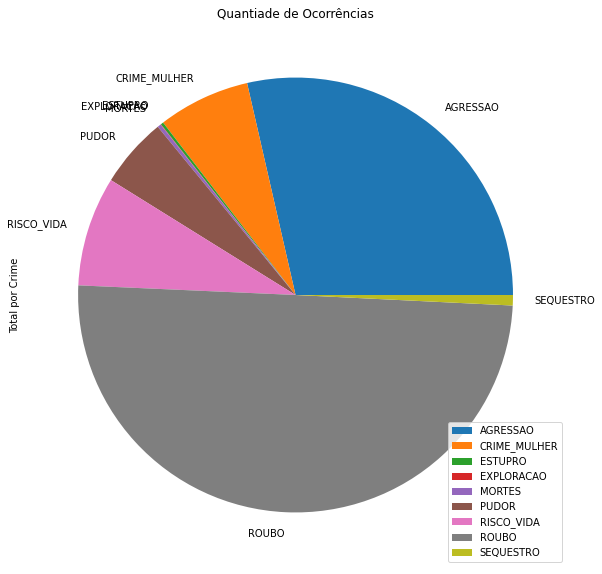

In [13]:
df_possiveis_crimes.plot(figsize=(15,10), kind='pie', y='TOTAL_POR_CRIME').legend(loc='lower right')
plt.ylabel('Total por Crime')
plt.title('Quantiade de Ocorrências')
plt.show()

Dá pra perceber que Roubo e Agressão já são mais que 75% dos casos, 

## Distribuição pelos dias da semana

### Entendendo Datas

In [14]:
display(df[["OCORRENCIA_ANO","OCORRENCIA_CODIGO","OCORRENCIA_DATA","OCORRENCIA_DIA_SEMANA","OCORRENCIA_HORA","OCORRENCIA_MES"]])

,OCORRENCIA_ANO,OCORRENCIA_CODIGO,OCORRENCIA_DATA,OCORRENCIA_DIA_SEMANA,OCORRENCIA_HORA,OCORRENCIA_MES
60,2009.0,5122.0,2009-03-13 09:20:00.000,SEXTA,09:20:00,3.0
95,2009.0,5507.0,2009-03-19 12:05:00.000,QUINTA,12:05:00,3.0
100,2009.0,4899.0,2009-03-09 14:00:00.000,SEGUNDA,14:00:00,3.0
103,2009.0,5401.0,2009-03-16 20:11:00.000,SEGUNDA,20:11:00,3.0
168,2009.0,3084.0,2009-02-13 08:10:00.000,SEXTA,08:10:00,2.0
...,...,...,...,...,...,...
389940,2017.0,192534.0,2017-04-19 10:40:00.000,QUARTA,10:40:00,4.0
389942,2017.0,195706.0,2017-06-08 10:43:00.000,QUINTA,10:43:00,6.0
389951,2018.0,224737.0,2018-09-23 09:12:00.000,DOMINGO,09:12:00,9.0
389952,2018.0,228986.0,2018-11-18 19:24:00.000,DOMINGO,19:24:00,11.0


### Segregando dias da semana

In [15]:
df_dias_semana = df.groupby('OCORRENCIA_DIA_SEMANA').size().rename('TOTAL_DIA_SEMANA')
df_dias_semana

OCORRENCIA_DIA_SEMANA
DOMINGO    8160
QUARTA     7515
QUINTA     7610
SEGUNDA    7211
SEXTA      7743
SÁBADO     8172
TERÇA      7338
Name: TOTAL_DIA_SEMANA, dtype: int64

Tentando entender a distribuição ao longo dos dias da semana

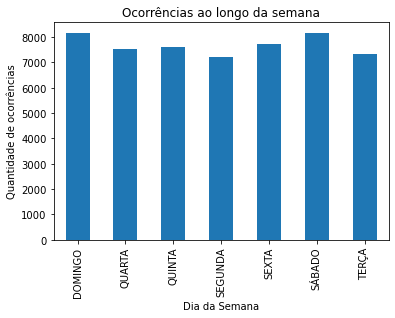

In [16]:
df_dias_semana.plot.bar()
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de ocorrências')
plt.title('Ocorrências ao longo da semana')
plt.show()

Dá pra perceber que está bem homogêneo pelos dias

## Distribuição pelos horários do dia

In [17]:
df['OCORRENCIA_HORA_SEM_MINUTO'] = df['OCORRENCIA_HORA'].str.split(':').str[0]

In [18]:
df_horas = df.groupby('OCORRENCIA_HORA_SEM_MINUTO').size().rename('TOTAL_POR_HORA')
df_horas.reset_index().sort_values(by='TOTAL_POR_HORA', ascending=False).head(5)

,OCORRENCIA_HORA_SEM_MINUTO,TOTAL_POR_HORA
21,21,3718
22,22,3643
20,20,3630
19,19,3389
16,16,3371


Ao longo do dia temos uma concentração maior a partir das 15:00

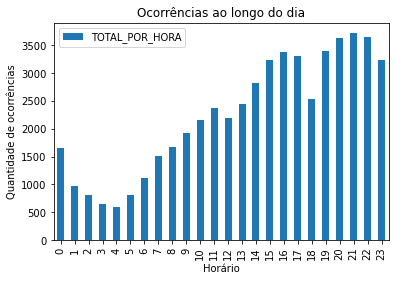

In [19]:
df_horas.reset_index().sort_values(by='OCORRENCIA_HORA_SEM_MINUTO', ascending=True).plot.bar()
plt.xlabel('Horário')
plt.ylabel('Quantidade de ocorrências')
plt.title('Ocorrências ao longo do dia')
plt.show()

## Segregando crimes por horário

In [20]:
df_horas_crime = df.groupby(['OCORRENCIA_HORA_SEM_MINUTO', 'NATUREZA']).size().rename('TOTAL_POR_HORA_CRIME')
df_horas_crime.reset_index().sort_values(by='TOTAL_POR_HORA_CRIME', ascending=False)

,OCORRENCIA_HORA_SEM_MINUTO,NATUREZA,TOTAL_POR_HORA_CRIME
178,21,ROUBO,2165
187,22,ROUBO,2108
195,23,ROUBO,1955
170,20,ROUBO,1909
161,19,ROUBO,1553
...,...,...,...
183,22,EXPLORACAO,1
166,20,EXPLORACAO,1
34,04,MORTES,1
42,05,MORTES,1


Salvando os crimes por ordem de mais comuns para uso nas legendas futuras

In [21]:
crimes_ordem_alfabetica = df_horas_crime.reset_index().sort_values(by='NATUREZA')['NATUREZA'].unique().tolist()

crimes_mais_comuns = df_horas_crime.reset_index().sort_values(by='TOTAL_POR_HORA_CRIME', ascending=False)['NATUREZA'].unique().tolist()

order_graficos = []
for crime in crimes_mais_comuns:
    order_graficos.append(crimes_ordem_alfabetica.index(crime))

In [22]:
df_horas_crimes_merge = df_horas.to_frame().reset_index().merge(df_horas_crime.to_frame().reset_index())
df_horas_crimes_merge = df_horas_crimes_merge[['OCORRENCIA_HORA_SEM_MINUTO', 'NATUREZA', 'TOTAL_POR_HORA', 'TOTAL_POR_HORA_CRIME']]
df_horas_crimes_merge['TAXA'] = (df_horas_crimes_merge['TOTAL_POR_HORA_CRIME'] / df_horas_crimes_merge['TOTAL_POR_HORA']) * 100
display(df_horas_crimes_merge)

,OCORRENCIA_HORA_SEM_MINUTO,NATUREZA,TOTAL_POR_HORA,TOTAL_POR_HORA_CRIME,TAXA
0,00,AGRESSAO,1660,546,32.891566
1,00,CRIME_MULHER,1660,129,7.771084
2,00,ESTUPRO,1660,4,0.240964
3,00,MORTES,1660,2,0.120482
4,00,PUDOR,1660,39,2.349398
...,...,...,...,...,...
192,23,MORTES,3239,15,0.463106
193,23,PUDOR,3239,59,1.821550
194,23,RISCO_VIDA,3239,159,4.908923
195,23,ROUBO,3239,1955,60.358135


In [23]:
df_horas_crimes_pivot = df_horas_crimes_merge.pivot(index='OCORRENCIA_HORA_SEM_MINUTO', columns='NATUREZA', values='TOTAL_POR_HORA_CRIME')
df_horas_crimes_pivot.head(4)

NATUREZA,AGRESSAO,CRIME_MULHER,ESTUPRO,EXPLORACAO,MORTES,PUDOR,RISCO_VIDA,ROUBO,SEQUESTRO
OCORRENCIA_HORA_SEM_MINUTO,,,,,,,,,
00,546.0,129.0,4.0,NaN,2.0,39.0,109.0,820.0,11.0
01,346.0,104.0,3.0,NaN,3.0,20.0,72.0,409.0,5.0
02,271.0,79.0,4.0,NaN,3.0,12.0,80.0,355.0,4.0
03,210.0,47.0,1.0,NaN,2.0,13.0,56.0,326.0,1.0


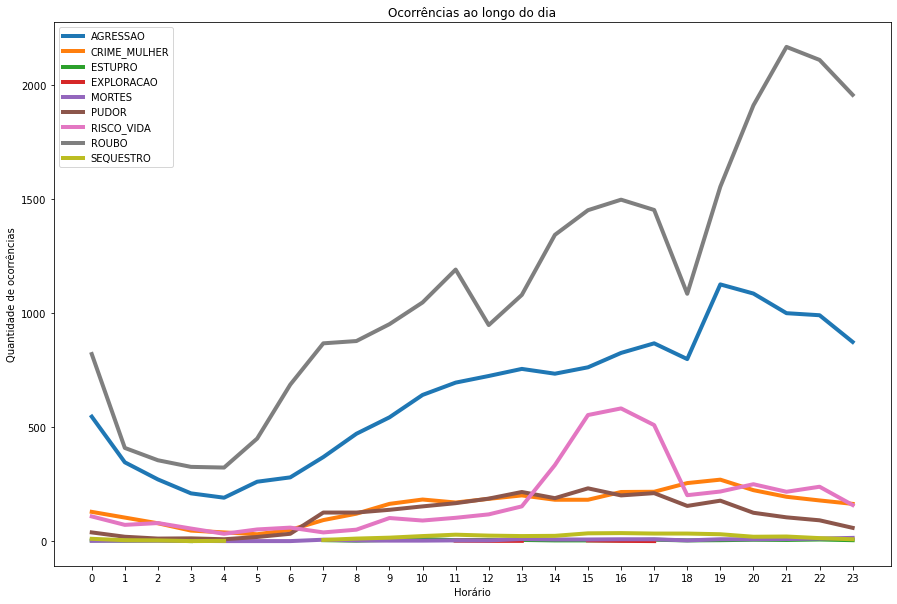

In [24]:
df_horas_crimes_pivot.plot.line(figsize=(15,10), linewidth=4).legend()

plt.xlabel('Horário')
plt.ylabel('Quantidade de ocorrências')
plt.title('Ocorrências ao longo do dia')
plt.xticks(np.arange(0, 24), np.arange(0, 24))
plt.show()

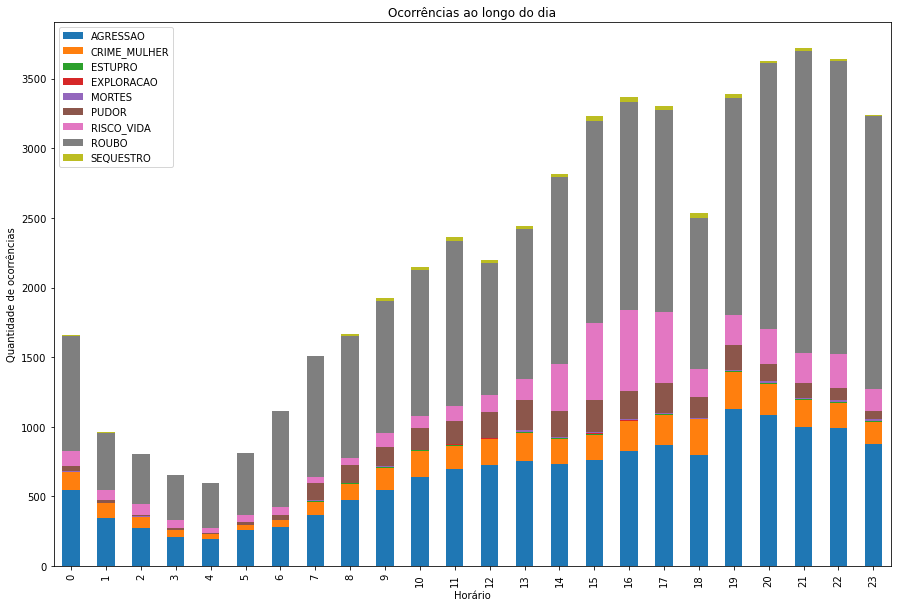

In [25]:
df_horas_crimes_pivot.plot.bar(figsize=(15,10), linewidth=4, stacked=True).legend()

plt.xlabel('Horário')
plt.ylabel('Quantidade de ocorrências')
plt.title('Ocorrências ao longo do dia')
plt.xticks(np.arange(0, 24), np.arange(0, 24))
plt.show()

A tendência de todos os tipos não são a mesma, roubos aumentam bastante depois das 10h e tem um pico às 21h, já agressão tem um pico às 19h.

Uma observação interessante é que ocorrências do tipo de risco a vida ocorrem mais entre as 15h e 18h.

Porém, crimes a mulher e outras categorias são constantes durante o dia, apenas diminuindo na madrugada

## Salvando

In [26]:
df = df[['OCORRENCIA_CODIGO', 'NATUREZA1_DESCRICAO', 'NATUREZA', 'ATENDIMENTO_BAIRRO_NOME', 'REGIONAL_FATO_NOME',
       'OCORRENCIA_ANO', 'OCORRENCIA_DATA', 'OCORRENCIA_HORA', 'OCORRENCIA_HORA_SEM_MINUTO', 'OCORRENCIA_MES', 'OCORRENCIA_DIA_SEMANA',
       'OCORRENCIA_DATA_SEM_HORARIO', 'FERIADO', 'LATITUDE', 'LONGITUDE']]

In [27]:
df.to_csv('../data/analise_crime_filtrado.csv', index = False)

## Análise de Geográficos

In [28]:
print(len(df[df[['LATITUDE', 'LONGITUDE']].isnull().any(axis=1)]))

print(len(df[df[['LATITUDE', 'LONGITUDE']].notnull().all(axis=1)]))

3566
50183
